# Name: Pranshu Dhingra

## Objective: Predicting the percentage of the student based on the number of study hours

----------------------------------------------------------------------------------

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import seaborn as sns
sns.set()

# Reading the Data

In [2]:
data=pd.read_csv('SML_dataset.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
y=data['Scores']
x=data['Hours']

In [4]:
x.shape

(25,)

In [5]:
y.shape

(25,)

# Checking the Assumptions of Linear Regression

### (A.) The condition of linearity can be checked by visualizing the scatterplot.

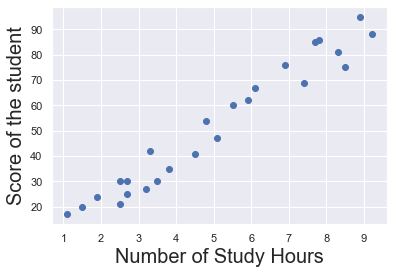

In [6]:
plt.scatter(x,y)
plt.xlabel('Number of Study Hours',fontsize=20)
plt.ylabel('Score of the student',fontsize=20)
plt.show()

The scatterplot shows a strong and positive linear correlation between the number of hours studied by the student and the corresponding scores.

### (B.) Normality and Homoscedasticity of Error Terms:

The normality of the error terms is checked in two ways:

(1.) The mean of the error terms is zero. The regression line will not be the line of best fit if the mean of the error tersm is not zero.

(2.) Visualizing the QQ-plot, that is, a graph of the residuals versus the expected order statistics of the standard normal distribution. It will plot the quantiles of the residuals versus the quantiles of the distribution.

The homoscedasticity of the error terms is checked by visualizing the residuals versus fitted plots. No pattern in the observatiosn means that the error terms are homoscedastic.

Note: The homoscedasticity of the error terms is checked by visualizing the scatterplot with the line of regression on it. If the observations (sample points) tend to appear closer near the origin and then diverges as the observations get further away from the origin around the regression line itself, or in other words, there seems to be a well-defined pattern among the observations, we say that the variance of the error terms is not equal.



In [7]:
x1=sm.add_constant(x)
results=sm.OLS(y,x1).fit()

In [8]:
results.resid.mean()

2.4726887204451486e-14

The mean of the residuals is 0. Thus, the errors terms are normally distributed.

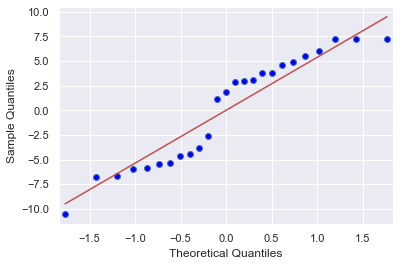

In [9]:
fig = sm.qqplot(results.resid,line='s')
plt.show()

The observations come very close to a straight line which implies that there is almost no skewness. 
Hence, the errors are normally distributed.

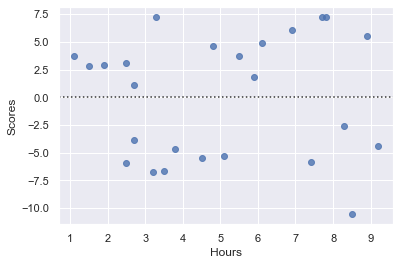

In [10]:
sns.residplot(x = "Hours",y = "Scores",data = data)
plt.show()

The above residuals versus fits plot shows randomness in the observations which imply that the error terms have equal variances (homoscedasticty).

### (C.) Autocorrelation in Error Terms

The autocorrelation between any two error terms must be 0. 

To check this, we are going to look for the randomness in the observations in the residuals versus fits plot.

We are also going to look for the Durbin Watson test. It's value approximately between 1.5 and 2.5 indicates no autocorrelation but the values apart from it raises an alarm for the autocorrelation to be present.

In [11]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(results.resid)

1.4601573762506714

The Durbin-Watson value is approximately 1.46 which is much closer to 1.5

Hence we can conclude that there is no autocorrelation between the error terms in the given dataset.

Moreover, the residuals plot (as shown in the (b.) part shows randomness in the observations.

#### Since all the assumptions of performing the regression analysis on the given dataset are met, we can move forward with predicting the best-fit line for our data.

# Preparing the Data

In [12]:
# In order to feed x to sklearn, it should be a 2D array (a matrix). Therefore, we must reshape it 
xmatrix = x.values.reshape(-1,1)
xmatrix.shape

(25, 1)

In [13]:
from sklearn.model_selection import train_test_split  

X_train, X_test, Y_train, Y_test = train_test_split(xmatrix, y, test_size=0.2, random_state=0) 

# Training the Algorithm

In [14]:
from sklearn.linear_model import LinearRegression 

reg = LinearRegression()  
reg.fit(X_train, Y_train) 

LinearRegression()

In [15]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [16]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [17]:
Y_train

22    35
17    24
24    86
23    76
14    17
1     47
10    85
13    42
8     81
6     88
18    67
4     30
9     25
7     60
20    30
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64

In [18]:
Y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [19]:
# coefficient of the regression
reg.coef_

array([9.91065648])

In [20]:
# intercept of the regression
reg.intercept_

2.018160041434683

# Making Predictions

In [21]:
print("The values in X test are: \n",X_test) # Testing data 
y_predicted = reg.predict(X_test) # Predicting the scores
print("The corresponding predicted scores are: \n",y_predicted)

The values in X test are: 
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
The corresponding predicted scores are: 
 [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [22]:
df = pd.DataFrame({'Actual Values': Y_test, 'Predicted Values': y_predicted})  
df.reset_index(drop=True)

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
new_data = pd.DataFrame(data=[5.5,7,8.6,3,9],columns=['Hours'])
reg.predict(new_data)
new_data['Scores'] = reg.predict(new_data)
new_data

,Hours,Scores
0,5.5,56.526771
1,7.0,71.392755
2,8.6,87.249806
3,3.0,31.750129
4,9.0,91.214068


In [24]:
# Different data values can be used for prediction
hours=[[3.5]]
own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 3.5
Predicted Score = 36.705457723682514


# Fitted Regression Model

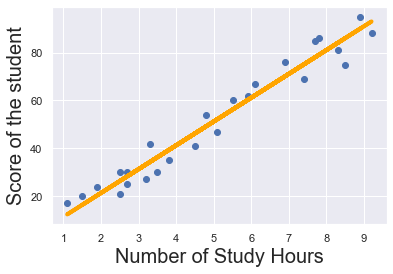

In [25]:
plt.scatter(xmatrix,y)
yhat=1.4208877598311105+9.95760312*xmatrix
fig=plt.plot(xmatrix,yhat,lw=4,c='orange',label='Regression Line')
plt.xlabel('Number of Study Hours',fontsize=20)
plt.ylabel('Score of the student',fontsize=20)
plt.show()

In [26]:
hours=[[9.25]]
own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the Model

In [27]:
import sklearn
from sklearn import metrics  

Mean_Squared_Error=sklearn.metrics.mean_squared_error(Y_test, y_predicted)
print("The Root Mean Squared Error is:\n",np.sqrt(Mean_Squared_Error))

The Root Mean Squared Error is:
 4.6474476121003665


The root mean squared error is used for evaluating the model and shows the approximate error while prediction.